In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
def smooth(arr, alpha=0.1):
    smoothed = []
    for i in range(len(arr)):
        if i == 0:
            smoothed.append(arr[i])
        else:
            smoothed.append((1-alpha)*smoothed[-1]+alpha*arr[i])
    return np.array(smoothed)

def plot_results(arr, title, dim_range):
    linewidth = 4
    fontsize = 20

    plt.figure(figsize=(7, 5))

    ax = plt.subplot(1, 1, 1)
    min_ = arr.min(axis=0)
    max_ = arr.max(axis=0)
    mean = arr.mean(axis=0)

    plt.plot(dim_range, mean, linewidth=linewidth)
    ax.fill_between(dim_range, min_, max_, alpha=0.15)

    plt.grid()
    plt.ylabel('Mean sum of rewards per episode', fontsize=fontsize)
    plt.xlabel('iteration', fontsize=fontsize)
    plt.title(title, fontsize=fontsize)

In [54]:
def plot_results_different(results_1, results_2, titles, dim_range,
                           reverse_order=False):
    linewidth = 4
    fontsize = 20

    plt.figure(figsize=(7, 5))

    if not reverse_order:
        ax = plt.subplot(1, 1, 1)
        arr = results_1

        min_ = arr.min(axis=0)
        max_ = arr.max(axis=0)
        mean = arr.mean(axis=0)

        plt.plot(dim_range, mean, linewidth=linewidth, label='baseline')
        ax.fill_between(dim_range, min_, max_, alpha=0.15)

        arr = results_2

        min_ = arr.min(axis=0)
        max_ = arr.max(axis=0)
        mean = arr.mean(axis=0)

        plt.plot(dim_range, mean, linewidth=linewidth, label='reward bonus')
        ax.fill_between(dim_range, min_, max_, alpha=0.15)

    else:
        ax = plt.subplot(1, 1, 1)
        arr = results_2
        min_ = arr.min(axis=0)
        max_ = arr.max(axis=0)
        mean = arr.mean(axis=0)

        plt.plot(dim_range, mean, linewidth=linewidth, label='reward bonus', color='#ff7f0e')
        ax.fill_between(dim_range, min_, max_, alpha=0.15)

        arr = results_1

        min_ = arr.min(axis=0)
        max_ = arr.max(axis=0)
        mean = arr.mean(axis=0)

        plt.plot(dim_range, mean, linewidth=linewidth, label='baseline', color='#1f77b4')
        ax.fill_between(dim_range, min_, max_, alpha=0.15)

            
        #smoothed = smooth(mean, alpha=0.2)
        #plt.plot(dim_range, smoothed, linewidth=2)

    plt.grid()
    plt.ylabel('Mean sum of rewards per iteration', fontsize=fontsize)
    plt.xlabel('iteration', fontsize=fontsize)
    plt.title(titles, fontsize=fontsize)
    plt.legend(loc='lower right', fontsize=fontsize)

In [51]:
acrobot_results = np.load('results/trpo_environments/trpo_acrobot.npy')
rew_acrobot_results = np.load('results/trpo_environments/trpo_acrobot_rew.npy')

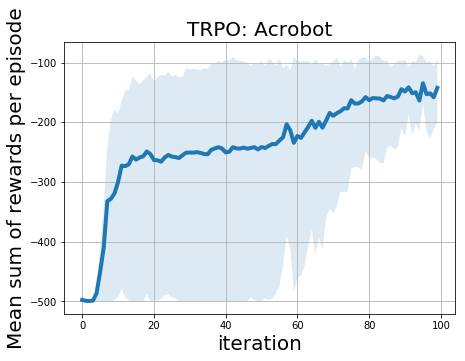

In [52]:
plot_results(acrobot_results,
            'TRPO: Acrobot', np.arange(acrobot_results.shape[1]))

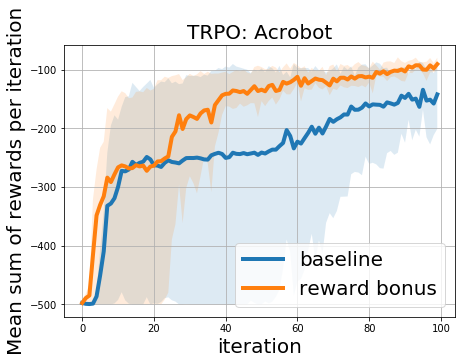

In [55]:
plot_results_different(acrobot_results, rew_acrobot_results,
                       'TRPO: Acrobot', np.arange(acrobot_results.shape[1]), reverse_order=False)

In [56]:
cart_pole_results = np.load('results/trpo_environments/trpo_cart_pole.npy')
rew_cart_pole_results = np.load('results/trpo_environments/trpo_cart_pole_rew.npy')

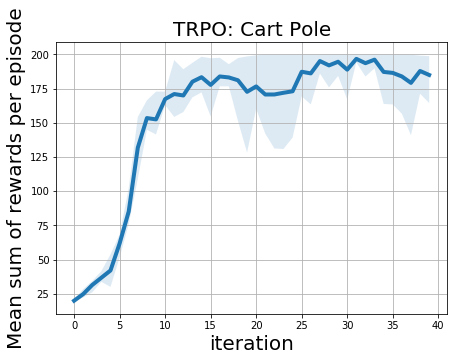

In [60]:
plot_results(cart_pole_results,
             'TRPO: Cart Pole', np.arange(cart_pole_results.shape[1]))

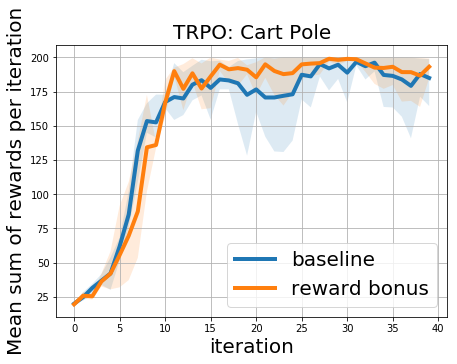

In [57]:
plot_results_different(cart_pole_results, rew_cart_pole_results,
                       'TRPO: Cart Pole', np.arange(cart_pole_results.shape[1]), reverse_order=False)

In [58]:
mountain_car_results = np.load('results/trpo_environments/trpo_moutain_car.npy')
#rew_mountain_car_results = np.load('results/trpo_environments/trpo_mountain_car_rew.npy')

In [59]:
mountain_car_results.sum(axis=1)

array([-400000.,       0.,       0.])

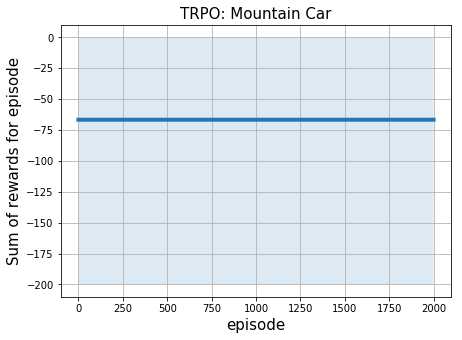

In [38]:
plot_results(mountain_car_results, 'TRPO: Mountain Car', np.arange(mountain_car_results.shape[1]))